<img src='https://www.unifor.br/o/unifor-theme/images/unifor-logo-horizontal.svg' width="250px">

# Estatística para a Ciência de Dados

Profs. Furlan e Hygor<br>
Aluno: José Freitas Alves Neto<br>
Matricula:2519203<br>
Laboratório de Ciência de Dados e Inteligência Artificial (LCDIA)<br>
Universidade de Fortaleza

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np,
from scipy.stats import chi2_contingency
import io
!gdown 1tZw5d5n4lQaI6eLhqhGsbU5pWwc70Flz

Downloading...
From: https://drive.google.com/uc?id=1tZw5d5n4lQaI6eLhqhGsbU5pWwc70Flz
To: /content/Filtered_Population_Attributes_from_DBF.csv
100% 263k/263k [00:00<00:00, 10.2MB/s]


# Tarefas

## 1. Leitura dos dados:

### Carregando o dataset

In [2]:
data = pd.read_csv('/content/Filtered_Population_Attributes_from_DBF.csv')
data

,Nome,PopResidAm,PopResidBr,PopResidIn,PopResidPa,PopResidPr,PopResidTo
0,Ariquemes - RO,317.0,31263,97.0,55534,9619,96833
1,Cabixi - RO,12.0,2136,2.0,2856,345,5351
2,Cacoal - RO,365.0,32304,1675.0,45836,6704,86887
3,Cerejeiras - RO,59.0,6213,13.0,8580,1025,15890
4,Alta Floresta D'Oeste - RO,46.0,7590,715.0,11845,1297,21494
...,...,...,...,...,...,...,...
5565,Guarantã do Norte - MT,46.0,11928,215.0,17053,1780,31024
5566,Guiratinga - MT,16.0,3209,12.0,6770,959,10966
5567,Indiavaí - MT,NaN,709,1.0,1367,136,2213
5568,Ipiranga do Norte - MT,16.0,3100,5.0,4086,608,7815


### Separando de município e sigla do estado

In [3]:
data['UF'] = data['Nome'].str[-2:]
data['Estados'] = data['Nome'].str[:-5]
data

,Nome,PopResidAm,PopResidBr,PopResidIn,PopResidPa,PopResidPr,PopResidTo,UF,Estados
0,Ariquemes - RO,317.0,31263,97.0,55534,9619,96833,RO,Ariquemes
1,Cabixi - RO,12.0,2136,2.0,2856,345,5351,RO,Cabixi
2,Cacoal - RO,365.0,32304,1675.0,45836,6704,86887,RO,Cacoal
3,Cerejeiras - RO,59.0,6213,13.0,8580,1025,15890,RO,Cerejeiras
4,Alta Floresta D'Oeste - RO,46.0,7590,715.0,11845,1297,21494,RO,Alta Floresta D'Oeste
...,...,...,...,...,...,...,...,...,...
5565,Guarantã do Norte - MT,46.0,11928,215.0,17053,1780,31024,MT,Guarantã do Norte
5566,Guiratinga - MT,16.0,3209,12.0,6770,959,10966,MT,Guiratinga
5567,Indiavaí - MT,NaN,709,1.0,1367,136,2213,MT,Indiavaí
5568,Ipiranga do Norte - MT,16.0,3100,5.0,4086,608,7815,MT,Ipiranga do Norte


## 2. Capitais brasileiras:

In [4]:
capitais_estados = [
    "Rio Branco - AC",
    "Maceió - AL",
    "Macapá - AP",
    "Manaus - AM",
    "Salvador - BA",
    "Fortaleza - CE",
    "Brasília - DF",
    "Vitória - ES",
    "Goiânia - GO",
    "São Luís - MA",
    "Cuiabá - MT",
    "Campo Grande - MS",
    "Belo Horizonte - MG",
    "Belém - PA",
    "João Pessoa - PB",
    "Curitiba - PR",
    "Recife - PE",
    "Teresina - PI",
    "Rio de Janeiro - RJ",
    "Natal - RN",
    "Porto Alegre - RS",
    "Porto Velho - RO",
    "Boa Vista - RR",
    "Florianópolis - SC",
    "São Paulo - SP",
    "Aracaju - SE",
    "Palmas - TO"
]
data = data.loc[data['Nome'].isin(capitais_estados)]
data

,Nome,PopResidAm,PopResidBr,PopResidIn,PopResidPa,PopResidPr,PopResidTo,UF,Estados
16,Porto Velho - RO,1287.0,120941,2628.0,292098,43467,460434,RO,Porto Velho
66,Rio Branco - AC,1089.0,88817,1762.0,238568,34518,364756,AC,Rio Branco
111,Manaus - AM,4463.0,489674,18854.0,1435484,115141,2063689,AM,Manaus
138,Boa Vista - RR,606.0,102242,18228.0,256902,35139,413486,RR,Boa Vista
169,Belém - PA,3298.0,342476,2069.0,806103,149395,1303403,PA,Belém
303,Macapá - AP,532.0,104145,1079.0,280577,56592,442933,AP,Macapá
443,Palmas - TO,1086.0,89826,645.0,173258,37871,302692,TO,Palmas
635,São Luís - MA,1132.0,274026,1519.0,593182,167885,1037775,MA,São Luís
882,Teresina - PI,987.0,212511,1195.0,526745,124850,866300,PI,Teresina
949,Fortaleza - CE,3127.0,793975,3000.0,1456901,171018,2428708,CE,Fortaleza


### Montando tabela de contingência

In [5]:
data.set_index('Estados', inplace = True)
data = data.iloc[:,1:6]
data["Total"] = data.sum(axis = 1)
data

,PopResidAm,PopResidBr,PopResidIn,PopResidPa,PopResidPr,Total
Estados,,,,,,
Porto Velho,1287.0,120941,2628.0,292098,43467,460421.0
Rio Branco,1089.0,88817,1762.0,238568,34518,364754.0
Manaus,4463.0,489674,18854.0,1435484,115141,2063616.0
Boa Vista,606.0,102242,18228.0,256902,35139,413117.0
Belém,3298.0,342476,2069.0,806103,149395,1303341.0
Macapá,532.0,104145,1079.0,280577,56592,442925.0
Palmas,1086.0,89826,645.0,173258,37871,302686.0
São Luís,1132.0,274026,1519.0,593182,167885,1037744.0
Teresina,987.0,212511,1195.0,526745,124850,866288.0


### Aplicando o teste Qui-Quadrado de independência

In [9]:
# Ler os dados para um DataFrame do Pandas
df_counts = data

# Selecionar as colunas que representam as contagens observadas para o teste
# Excluindo a coluna 'Total'
value_columns_counts = ['PopResidAm', 'PopResidBr', 'PopResidIn', 'PopResidPa', 'PopResidPr']
observado_counts = df_counts[value_columns_counts].values

# Aplicar o teste qui-quadrado de independência
try:
    chi2_stat, p_valor, gl, esperado = chi2_contingency(observado_counts)

    # Exibir os resultados
    print(f"Estatística Qui-Quadrado (χ²): {chi2_stat:.4f}")
    if p_valor < 0.000001:
        print(f"Valor-p: {p_valor:e}")
    else:
        print(f"Valor-p: {p_valor:.6f}")

    df_esperado = pd.DataFrame(esperado, index=df_counts.index, columns=value_columns_counts)

    # Interpretar o resultado (com base no valor-p)
    alfa = 0.05  # Nível de significância

    print(f"\nInterpretação com nível de significância alfa = {alfa}:")
    if p_valor <= alfa:
        print("Rejeitamos a hipótese nula (H0).")
        print("Há evidência estatística de que existe uma associação significativa entre os Estados e a distribuição das populações étnicas.")
    else:
        print("Não rejeitamos a hipótese nula (H0).")
        print("Não há evidência estatística suficiente para concluir que existe uma associação significativa entre os Estados e a distribuição das populações étnicas.")

    print("\nNota sobre o teste:")
    print("Este teste foi aplicado a contagens populacionais. A interpretação do valor-p é direta.")
    if np.any(esperado < 5):
        num_small_expected = np.sum(esperado < 5)
        total_cells = esperado.size
        percent_small = (num_small_expected / total_cells) * 100
        print(f"Atenção: {num_small_expected} de {total_cells} células ({percent_small:.2f}%) têm frequência esperada menor que 5.")
        print("Isso pode afetar a validade do teste qui-quadrado. Considere agrupar categorias se apropriado, ou use testes alternativos se muitas células tiverem baixas frequências esperadas.")

except ValueError as e:
    print(f"Erro ao aplicar o teste: {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Estatística Qui-Quadrado (χ²): 6283652.2984
Valor-p: 0.000000e+00

Interpretação com nível de significância alfa = 0.05:
Rejeitamos a hipótese nula (H0).
Há evidência estatística de que existe uma associação significativa entre os Estados e a distribuição das populações étnicas.

Nota sobre o teste:
Este teste foi aplicado a contagens populacionais. A interpretação do valor-p é direta.


- Gerando gráfico

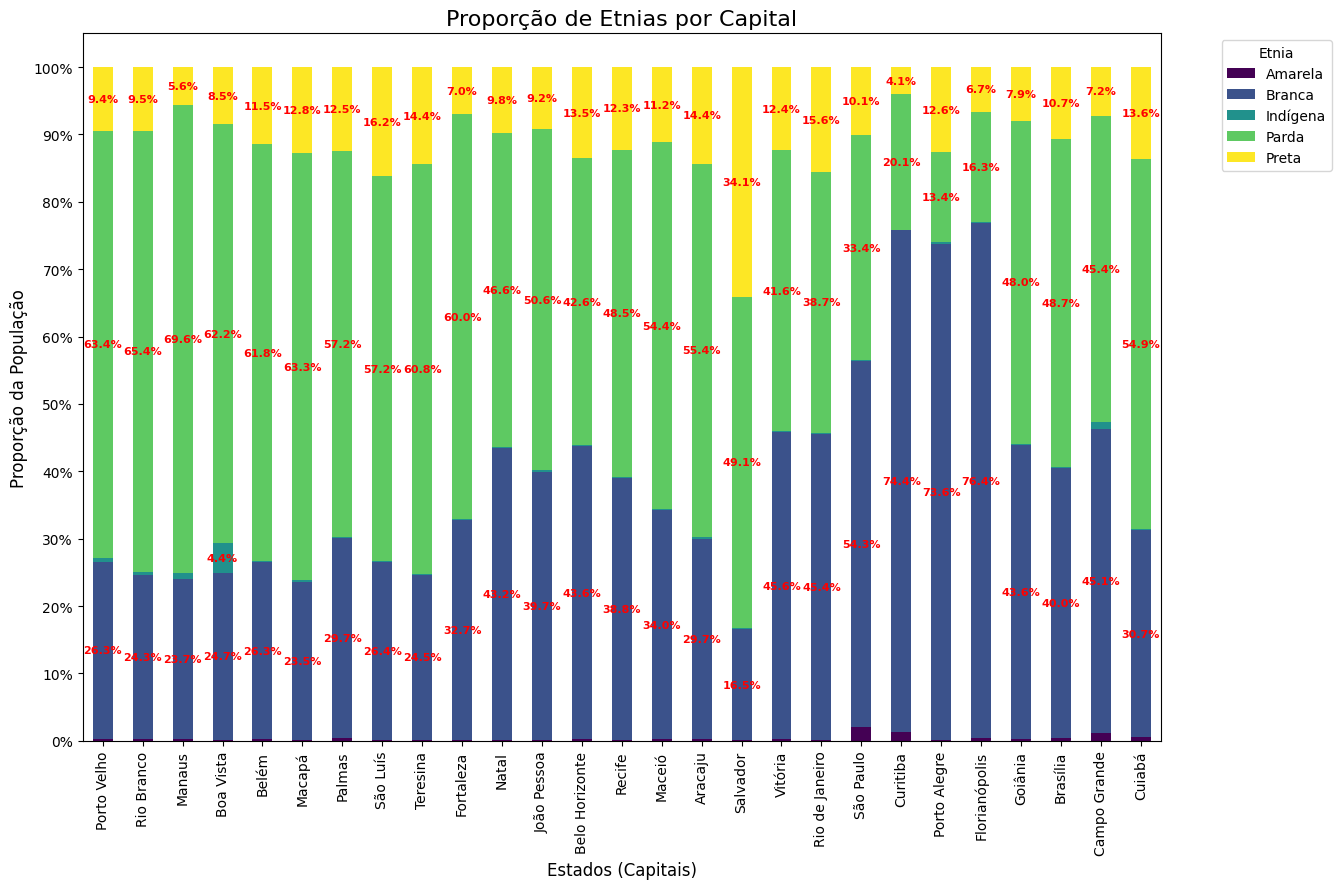

Gráfico de barras 100% empilhadas com números destacados em vermelho salvo como 'proporcao_etnias_por_estado_empilhado_vermelho.png'


In [15]:
# Define ethnicity columns and their display names
ethnicity_columns = ['PopResidAm', 'PopResidBr', 'PopResidIn', 'PopResidPa', 'PopResidPr']
ethnicity_names = {
    'PopResidAm': 'Amarela',
    'PopResidBr': 'Branca',
    'PopResidIn': 'Indígena',
    'PopResidPa': 'Parda',
    'PopResidPr': 'Preta'
}

# Set 'Estados' as index for easier plotting
df_plot = data

# Calculate the sum of the specified ethnicity columns for normalization
df_plot['SumEtnia'] = df_plot[ethnicity_columns].sum(axis=1)

# Calculate proportions for each ethnicity
df_proportions = pd.DataFrame(index=df_plot.index)
for col in ethnicity_columns:
    df_proportions[col] = df_plot[col] / df_plot['SumEtnia']

# Rename columns for the legend
df_proportions_renamed = df_proportions.rename(columns=ethnicity_names)

# Plotting the 100% stacked bar chart
fig, ax = plt.subplots(figsize=(16, 9))
df_proportions_renamed.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    colormap='viridis' # Using a colormap for distinct colors
)

ax.set_title('Proporção de Etnias por Capital', fontsize=16)
ax.set_xlabel('Estados (Capitais)', fontsize=12)
ax.set_ylabel('Proporção da População', fontsize=12)
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels([f'{i*100:.0f}%' for i in np.arange(0, 1.1, 0.1)], fontsize=10)
ax.legend(title='Etnia', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
fig.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend

# Add percentage labels to each segment of the stacked bars
for i, state_name in enumerate(df_proportions_renamed.index):
    cumulative_height = 0
    for j, ethnicity_name in enumerate(df_proportions_renamed.columns):
        proportion = df_proportions_renamed.loc[state_name, ethnicity_name]
        if proportion > 0:
            text_y_position = cumulative_height + proportion / 2
            if proportion > 0.03: # Only add label if segment is large enough
                 # Changed color to 'red' and made font bold for better visibility
                 ax.text(i, text_y_position, f"{proportion*100:.1f}%",
                         ha='center', va='center', color='red', fontsize=8, fontweight='bold')
        cumulative_height += proportion

plt.savefig('proporcao_etnias_por_estado_empilhado_vermelho.png')
plt.show()

# 3. Faixas populacionais:

In [18]:
data = pd.read_csv('/content/Filtered_Population_Attributes_from_DBF.csv')
list_tamanho = []
for x in range(data.shape[0]):
  if data['PopResidTo'].iloc[x] <= 20000:
    list_tamanho.append('Pequeno')
  elif data['PopResidTo'].iloc[x] > 20000 and data['PopResidTo'].iloc[x] <= 100000:
    list_tamanho.append('Médio')
  else:
    list_tamanho.append('Grande')
data['Tamanho_Municipio'] = list_tamanho
data

,Nome,PopResidAm,PopResidBr,PopResidIn,PopResidPa,PopResidPr,PopResidTo,Tamanho_Municipio
0,Ariquemes - RO,317.0,31263,97.0,55534,9619,96833,Médio
1,Cabixi - RO,12.0,2136,2.0,2856,345,5351,Pequeno
2,Cacoal - RO,365.0,32304,1675.0,45836,6704,86887,Médio
3,Cerejeiras - RO,59.0,6213,13.0,8580,1025,15890,Pequeno
4,Alta Floresta D'Oeste - RO,46.0,7590,715.0,11845,1297,21494,Médio
...,...,...,...,...,...,...,...,...
5565,Guarantã do Norte - MT,46.0,11928,215.0,17053,1780,31024,Médio
5566,Guiratinga - MT,16.0,3209,12.0,6770,959,10966,Pequeno
5567,Indiavaí - MT,NaN,709,1.0,1367,136,2213,Pequeno
5568,Ipiranga do Norte - MT,16.0,3100,5.0,4086,608,7815,Pequeno


- Agrupando os dados

In [20]:
data_group = data.groupby('Tamanho_Municipio').sum()
data_group

,Nome,PopResidAm,PopResidBr,PopResidIn,PopResidPa,PopResidPr,PopResidTo
Tamanho_Municipio,,,,,,,
Grande,Ji-Paraná - ROPorto Velho - RORio Branco - ACI...,660979.0,52792788,276118.0,49081639,12826507,115643935
Médio,Ariquemes - ROCacoal - ROAlta Floresta D'Oeste...,133680.0,22372388,550606.0,27274214,5083183,55417219
Pequeno,Cabixi - ROCerejeiras - ROColorado do Oeste - ...,55471.0,13086945,400918.0,15727433,2746768,32019602


- Aplicando teste Qui-Quadrado

In [22]:
# Ler os dados para um DataFrame do Pandas
df_counts = data_group

# Selecionar as colunas que representam as contagens observadas para o teste
# Excluindo a coluna 'Total'
value_columns_counts = ['PopResidAm', 'PopResidBr', 'PopResidIn', 'PopResidPa', 'PopResidPr']
observado_counts = df_counts[value_columns_counts].values

# Aplicar o teste qui-quadrado de independência
try:
    chi2_stat, p_valor, gl, esperado = chi2_contingency(observado_counts)

    # Exibir os resultados
    print(f"Estatística Qui-Quadrado (χ²): {chi2_stat:.4f}")
    if p_valor < 0.000001:
        print(f"Valor-p: {p_valor:e}")
    else:
        print(f"Valor-p: {p_valor:.6f}")

    df_esperado = pd.DataFrame(esperado, index=df_counts.index, columns=value_columns_counts)

    # Interpretar o resultado (com base no valor-p)
    alfa = 0.05  # Nível de significância

    print(f"\nInterpretação com nível de significância alfa = {alfa}:")
    if p_valor <= alfa:
        print("Rejeitamos a hipótese nula (H0).")
        print("Há evidência estatística de que existe uma associação significativa entre os tamanhos dos municípios e a distribuição das populações étnicas.")
    else:
        print("Não rejeitamos a hipótese nula (H0).")
        print("Não há evidência estatística suficiente para concluir que existe uma associação significativa entre os Estados e a distribuição das populações étnicas.")
    if np.any(esperado < 5):
        num_small_expected = np.sum(esperado < 5)
        total_cells = esperado.size
        percent_small = (num_small_expected / total_cells) * 100
        print(f"Atenção: {num_small_expected} de {total_cells} células ({percent_small:.2f}%) têm frequência esperada menor que 5.")
        print("Isso pode afetar a validade do teste qui-quadrado. Considere agrupar categorias se apropriado, ou use testes alternativos se muitas células tiverem baixas frequências esperadas.")

except ValueError as e:
    print(f"Erro ao aplicar o teste: {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Estatística Qui-Quadrado (χ²): 1797035.7061
Valor-p: 0.000000e+00

Interpretação com nível de significância alfa = 0.05:
Rejeitamos a hipótese nula (H0).
Há evidência estatística de que existe uma associação significativa entre os tamanhos dos municípios e a distribuição das populações étnicas.

Nota sobre o teste:
Este teste foi aplicado a contagens populacionais. A interpretação do valor-p é direta.


- Como rejeitamos a hipotese nula, temos que existe uma relação significativa entre o tamanho da população e a não aleatóriedade da população étnica.

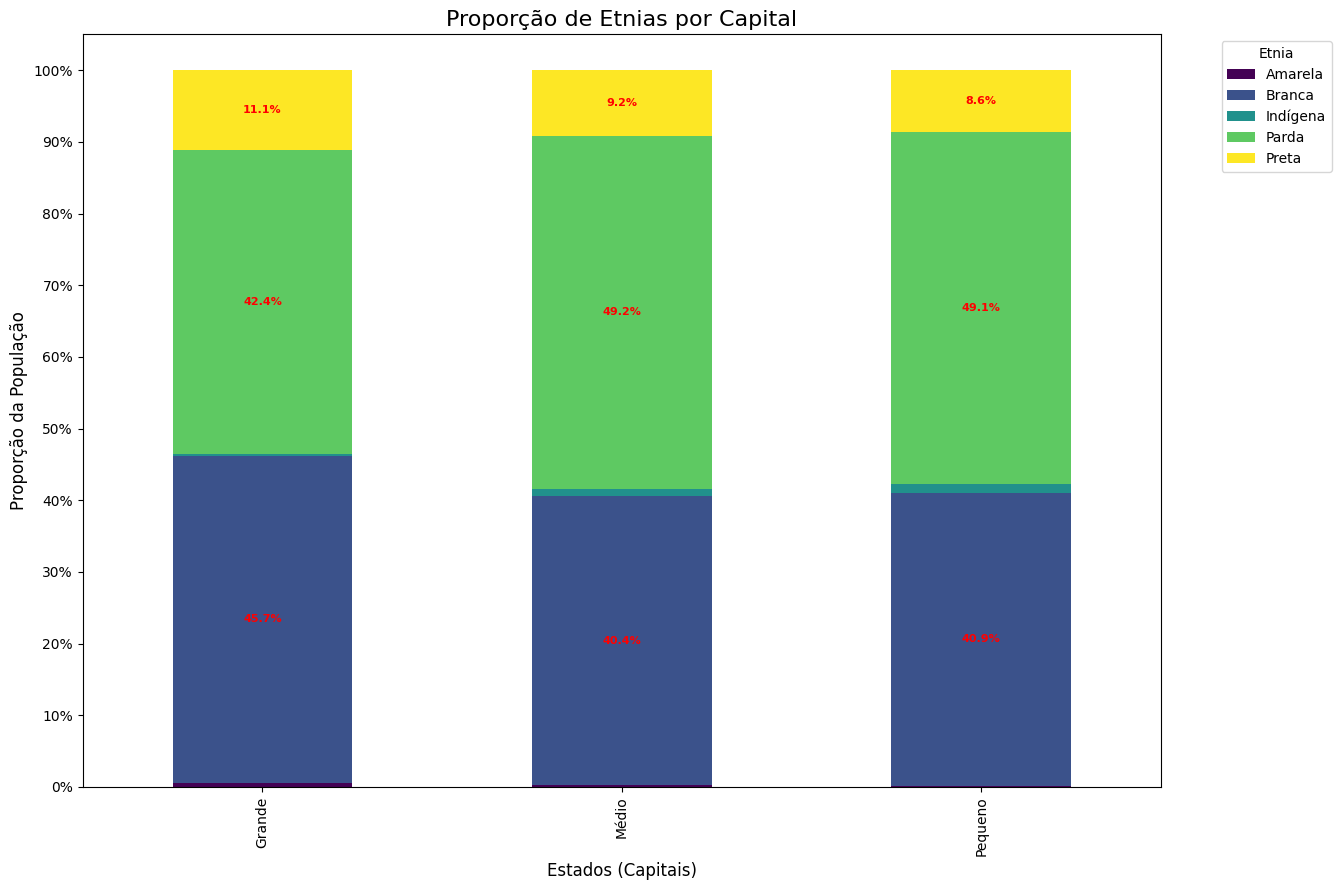

In [24]:
# Define ethnicity columns and their display names
ethnicity_columns = ['PopResidAm', 'PopResidBr', 'PopResidIn', 'PopResidPa', 'PopResidPr']
ethnicity_names = {
    'PopResidAm': 'Amarela',
    'PopResidBr': 'Branca',
    'PopResidIn': 'Indígena',
    'PopResidPa': 'Parda',
    'PopResidPr': 'Preta'
}

# Set 'Estados' as index for easier plotting
df_plot = data_group

# Calculate the sum of the specified ethnicity columns for normalization
df_plot['SumEtnia'] = df_plot[ethnicity_columns].sum(axis=1)

# Calculate proportions for each ethnicity
df_proportions = pd.DataFrame(index=df_plot.index)
for col in ethnicity_columns:
    df_proportions[col] = df_plot[col] / df_plot['SumEtnia']

# Rename columns for the legend
df_proportions_renamed = df_proportions.rename(columns=ethnicity_names)

# Plotting the 100% stacked bar chart
fig, ax = plt.subplots(figsize=(16, 9))
df_proportions_renamed.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    colormap='viridis' # Using a colormap for distinct colors
)

ax.set_title('Proporção de Etnias por Capital', fontsize=16)
ax.set_xlabel('Estados (Capitais)', fontsize=12)
ax.set_ylabel('Proporção da População', fontsize=12)
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels([f'{i*100:.0f}%' for i in np.arange(0, 1.1, 0.1)], fontsize=10)
ax.legend(title='Etnia', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
fig.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend

# Add percentage labels to each segment of the stacked bars
for i, state_name in enumerate(df_proportions_renamed.index):
    cumulative_height = 0
    for j, ethnicity_name in enumerate(df_proportions_renamed.columns):
        proportion = df_proportions_renamed.loc[state_name, ethnicity_name]
        if proportion > 0:
            text_y_position = cumulative_height + proportion / 2
            if proportion > 0.03: # Only add label if segment is large enough
                 # Changed color to 'red' and made font bold for better visibility
                 ax.text(i, text_y_position, f"{proportion*100:.1f}%",
                         ha='center', va='center', color='red', fontsize=8, fontweight='bold')
        cumulative_height += proportion

plt.savefig('proporcao_etnias_por_estado_empilhado_vermelho.png')
plt.show()

# 4. Regiões do Brasil:

In [28]:
df = pd.read_csv('/content/Filtered_Population_Attributes_from_DBF.csv')
# Função para extrair a UF da coluna 'Nome'
def extrair_uf(nome_cidade):
    try:
        return nome_cidade.split(' - ')[1].strip()
    except IndexError:
        return None # Caso o formato não seja o esperado

df['UF'] = df['Nome'].apply(extrair_uf)

# Mapeamento de UFs para Regiões
mapa_regioes = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte',
    'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste',
    'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul',
    'PE': 'Nordeste', 'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste',
    'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte', 'SC': 'Sul',
    'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
}

df['Regiao'] = df['UF'].map(mapa_regioes)

# Selecionar apenas as colunas numéricas de população para agregação
colunas_populacao = ['PopResidAm', 'PopResidBr', 'PopResidIn', 'PopResidPa', 'PopResidPr', 'PopResidTo']

# Agrupar por 'Regiao' e somar as populações
dados_agrupados_por_regiao = df.groupby('Regiao')[colunas_populacao].sum()
dados_agrupados_por_regiao

,PopResidAm,PopResidBr,PopResidIn,PopResidPa,PopResidPr,PopResidTo
Regiao,,,,,,
Centro-Oeste,60224.0,6033785,168684.0,8536279,1490124,16289538
Nordeste,68749.0,14571557,327725.0,32559846,7127018,54658515
Norte,29467.0,3598298,539821.0,11654390,1530418,17354884
Sudeste,570852.0,42318768,109934.0,32833389,9003372,84840113
Sul,120838.0,21729713,81478.0,6499382,1505526,29937706


- Aplicando teste Qui-Quadrado

In [32]:
# Ler os dados para um DataFrame do Pandas
df_counts = dados_agrupados_por_regiao

# Selecionar as colunas que representam as contagens observadas para o teste
# Excluindo a coluna 'Total'
value_columns_counts = ['PopResidAm', 'PopResidBr', 'PopResidIn', 'PopResidPa', 'PopResidPr']
observado_counts = df_counts[value_columns_counts].values

# Aplicar o teste qui-quadrado de independência
try:
    chi2_stat, p_valor, gl, esperado = chi2_contingency(observado_counts)

    # Exibir os resultados
    print(f"Estatística Qui-Quadrado (χ²): {chi2_stat:.4f}")
    if p_valor < 0.000001:
        print(f"Valor-p: {p_valor:e}")
    else:
        print(f"Valor-p: {p_valor:.6f}")

    df_esperado = pd.DataFrame(esperado, index=df_counts.index, columns=value_columns_counts)

    # Interpretar o resultado (com base no valor-p)
    alfa = 0.05  # Nível de significância

    print(f"\nInterpretação com nível de significância alfa = {alfa}:")
    if p_valor <= alfa:
        print("Rejeitamos a hipótese nula (H0).")
        print("Há evidência estatística de que existe uma associação significativa entre as regiões do Brasil e a distribuição das populações étnicas.")
    else:
        print("Não rejeitamos a hipótese nula (H0).")
        print("Não há evidência estatística suficiente para concluir que existe uma associação significativa entre os Estados e a distribuição das populações étnicas.")
    if np.any(esperado < 5):
        num_small_expected = np.sum(esperado < 5)
        total_cells = esperado.size
        percent_small = (num_small_expected / total_cells) * 100
        print(f"Atenção: {num_small_expected} de {total_cells} células ({percent_small:.2f}%) têm frequência esperada menor que 5.")
        print("Isso pode afetar a validade do teste qui-quadrado. Considere agrupar categorias se apropriado, ou use testes alternativos se muitas células tiverem baixas frequências esperadas.")

except ValueError as e:
    print(f"Erro ao aplicar o teste: {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Estatística Qui-Quadrado (χ²): 25146791.3804
Valor-p: 0.000000e+00

Interpretação com nível de significância alfa = 0.05:
Rejeitamos a hipótese nula (H0).
Há evidência estatística de que existe uma associação significativa entre as regiões do Brasil e a distribuição das populações étnicas.


- O teste Qui-Quadrado indica, a um nível de significância de 0.05, uma associação estatisticamente significativa entre as regiões do Brasil e a distribuição das populações étnicas, rejeitando a hipótese nula.

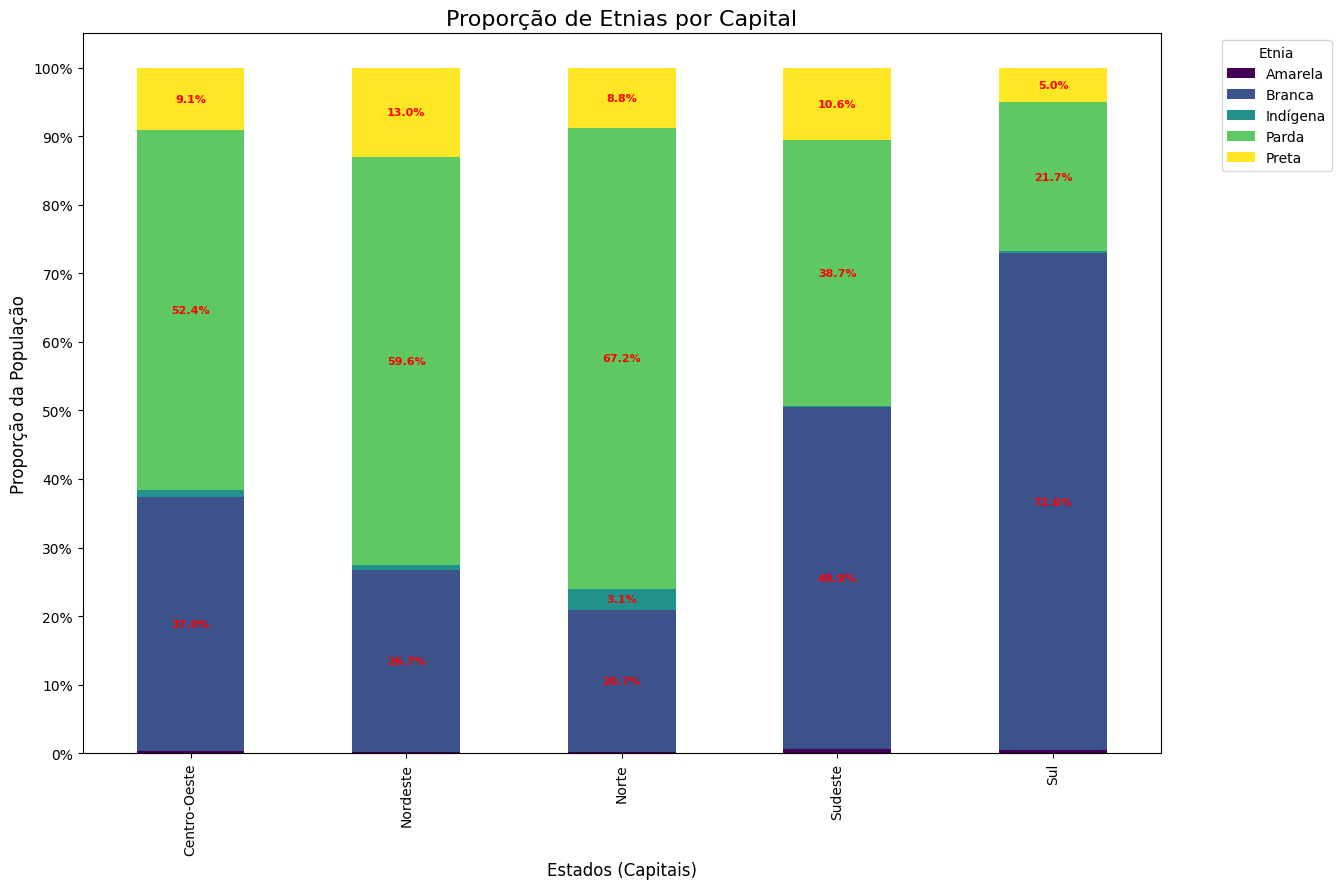

In [33]:
# Define ethnicity columns and their display names
ethnicity_columns = ['PopResidAm', 'PopResidBr', 'PopResidIn', 'PopResidPa', 'PopResidPr']
ethnicity_names = {
    'PopResidAm': 'Amarela',
    'PopResidBr': 'Branca',
    'PopResidIn': 'Indígena',
    'PopResidPa': 'Parda',
    'PopResidPr': 'Preta'
}

# Set 'Estados' as index for easier plotting
df_plot = dados_agrupados_por_regiao

# Calculate the sum of the specified ethnicity columns for normalization
df_plot['SumEtnia'] = df_plot[ethnicity_columns].sum(axis=1)

# Calculate proportions for each ethnicity
df_proportions = pd.DataFrame(index=df_plot.index)
for col in ethnicity_columns:
    df_proportions[col] = df_plot[col] / df_plot['SumEtnia']

# Rename columns for the legend
df_proportions_renamed = df_proportions.rename(columns=ethnicity_names)

# Plotting the 100% stacked bar chart
fig, ax = plt.subplots(figsize=(16, 9))
df_proportions_renamed.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    colormap='viridis' # Using a colormap for distinct colors
)

ax.set_title('Proporção de Etnias por Capital', fontsize=16)
ax.set_xlabel('Estados (Capitais)', fontsize=12)
ax.set_ylabel('Proporção da População', fontsize=12)
ax.tick_params(axis='x', rotation=90, labelsize=10)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_yticklabels([f'{i*100:.0f}%' for i in np.arange(0, 1.1, 0.1)], fontsize=10)
ax.legend(title='Etnia', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
fig.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend

# Add percentage labels to each segment of the stacked bars
for i, state_name in enumerate(df_proportions_renamed.index):
    cumulative_height = 0
    for j, ethnicity_name in enumerate(df_proportions_renamed.columns):
        proportion = df_proportions_renamed.loc[state_name, ethnicity_name]
        if proportion > 0:
            text_y_position = cumulative_height + proportion / 2
            if proportion > 0.03: # Only add label if segment is large enough
                 # Changed color to 'red' and made font bold for better visibility
                 ax.text(i, text_y_position, f"{proportion*100:.1f}%",
                         ha='center', va='center', color='red', fontsize=8, fontweight='bold')
        cumulative_height += proportion

plt.savefig('proporcao_etnias_por_estado_empilhado_vermelho.png')
plt.show()